In [5]:
from astropy.io.votable import parse_single_table
import requests
from io import BytesIO
from astropy.time import Time
from specutils import SpectrumList
import re
import matplotlib.pyplot as plt


Code sourced from https://docs.datacentral.org.au/help-center/virtual-observatory-examples/ssa-accessing-original-spectra/

Filename: <class '_io.BytesIO'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   (4096,)   float64   


        Use Spectrum instead. [warnings]


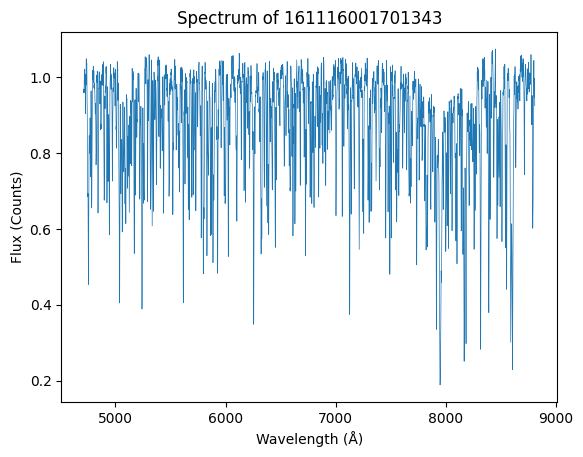

In [10]:
from astropy.io import fits
from specutils import Spectrum1D
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
import requests
from io import BytesIO

# === Download and open FITS ===
url = "https://datacentral.org.au/vo/slink/links?ID=161116001701343&DR=galah_dr4&IDX=0&FILT=B&RESPONSEFORMAT=fits"  # replace with actual URL
spec = requests.get(url).content
hdul = fits.open(BytesIO(spec))

hdul.info()
header = hdul[0].header
flux = hdul[0].data

# === Build wavelength axis from WCS keywords if available ===
crval1 = header.get('CRVAL1')   # starting wavelength
cdelt1 = header.get('CDELT1')   # dispersion per pixel
crpix1 = header.get('CRPIX1', 1)  # reference pixel (default to 1)

if crval1 is None or cdelt1 is None:
    raise ValueError("Missing CRVAL1 or CDELT1 in FITS header")

npix = len(flux)
wavelength = (crval1 + (np.arange(npix) + 1 - crpix1) * cdelt1) * u.AA

# === Create Spectrum1D object ===
spectrum = Spectrum1D(spectral_axis=wavelength, flux=flux * u.count)

# === Plot ===
plt.plot(spectrum.spectral_axis, spectrum.flux, linewidth=0.5)
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux (Counts)")
plt.title("Spectrum of 161116001701343")
plt.show()


Filename: <class '_io.BytesIO'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   (4096,)   float64   


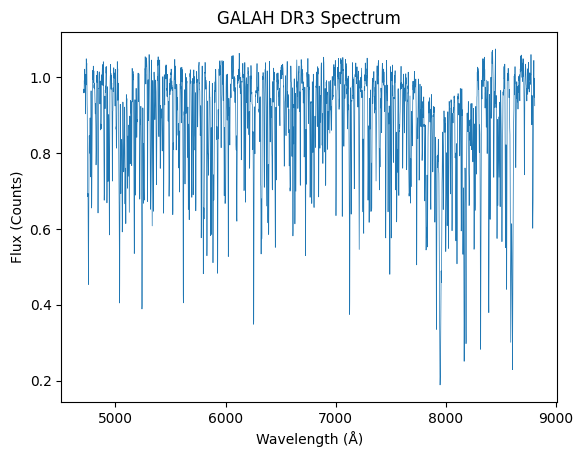

In [11]:
import requests
from io import BytesIO
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u

# === Step 1: Download and open the FITS file ===
url = "https://datacentral.org.au/vo/slink/links?ID=161116001701343&DR=galah_dr4&IDX=0&FILT=B&RESPONSEFORMAT=fits"
response = requests.get(url)
hdul = fits.open(BytesIO(response.content))

# === Step 2: Inspect file ===
hdul.info()

# === Step 3: Extract flux from PRIMARY HDU ===
flux = hdul[0].data
header = hdul[0].header

# === Step 4: Construct the wavelength axis from FITS WCS header ===
crval1 = header.get("CRVAL1")   # starting wavelength
cdelt1 = header.get("CDELT1")   # dispersion (Å/pixel)
crpix1 = header.get("CRPIX1", 1)  # reference pixel

if crval1 is None or cdelt1 is None:
    raise ValueError("Missing CRVAL1 or CDELT1 in FITS header — cannot build wavelength axis.")

npix = len(flux)
wavelength = (crval1 + (np.arange(npix) + 1 - crpix1) * cdelt1) * u.AA

# === Step 5: Plot ===
plt.plot(wavelength, flux, linewidth=0.5)
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux (Counts)")
plt.title("GALAH DR3 Spectrum")
plt.show()


In [13]:
from pyvo.dal.ssa import SSAService
import pandas as pd

target = "161116001701343"
service = SSAService("https://datacentral.org.au/vo/ssa/query")
results = service.search(TARGETNAME=target, COLLECTION="galah_dr4")

# Convert to pandas table
df = results.votable.get_first_table().to_table(use_names_over_ids=True).to_pandas()

# See what spectrum types are available
#print(df[["band_name", "dataproduct_subtype", "access_url"]])
print(df.loc[0, "access_url"])



https://datacentral.org.au/vo/slink/links?ID=161116001701343&DR=galah_dr4&IDX=0&FILT=V&DPSUBTYPE=normalised


In [18]:
# Assuming you already have the table from SSA:
first_url = df.loc[5, "access_url"] + "&RESPONSEFORMAT=fits"
first_url = 'https://datacentral.org.au/vo/slink/links?ID=161116001701343&DR=galah_dr4&IDX=0&FILT=V&DPSUBTYPE=sky&RESPONSEFORMAT=fits'

# Download the FITS file
response = requests.get(first_url)
hdul = fits.open(BytesIO(response.content))

# Print HDU info to see what extensions exist
hdul.info()
hdul[0].header  # or use print(hdul[0].header)


Filename: <class '_io.BytesIO'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   (4096,)   float64   


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                 4096                                                  
WCSAXES =                    1 / Number of coordinate axes                      
COMMENT This file was generated by Data Central for the Virtual Observatory Simp
COMMENT le Spectral Access (SSA) service from an original science file provided 
COMMENT to us. Visit our website at https://datacentral.org.au or use our SSA to
COMMENT  download the original file.                                            
HISTORY This file was generated at 2025-07-03T05:08:54.574901+10:00 with the 'dc
HISTORY -ssa-fits' writer by the Data Central SSA service.                      
BUNIT   = 'ct      '           / unknown                                        
CRPIX1  =                  1

        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]


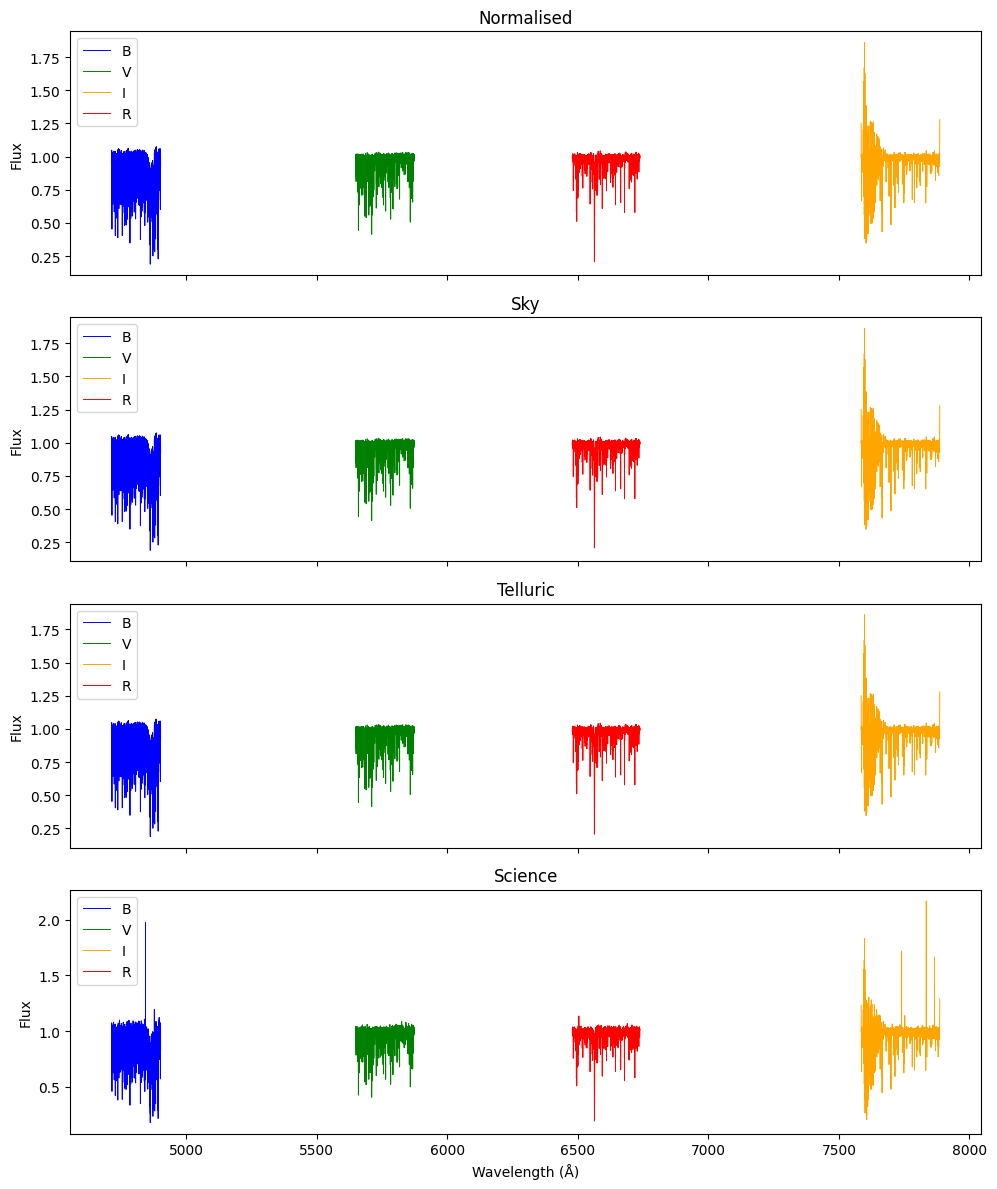

In [19]:
import matplotlib.pyplot as plt
from astropy.io import fits
from specutils import Spectrum1D
from astropy.visualization import quantity_support
from io import BytesIO
import requests

quantity_support()

# === SETTINGS ===
object_id = "161116001701343"
filters = ["B", "V", "I", "R"]
subtypes = ["normalised", "sky", "telluric", "science"]
titles = ["Normalised", "Sky", "Telluric", "Science"]
colors = {"B": "blue", "V": "green", "I": "orange", "R": "red"}

base_url = "https://datacentral.org.au/vo/slink/links"

# === SETUP PLOTS ===
fig, axs = plt.subplots(len(subtypes), 1, figsize=(10, 12), sharex=True)
fig.subplots_adjust(hspace=0.4)

# === LOOP THROUGH EACH DPSUBTYPE ===
for i, subtype in enumerate(subtypes):
    ax = axs[i]
    for filt in filters:
        url = (
            f"{base_url}?ID={object_id}&DR=galah_dr4&IDX=0"
            f"&FILT={filt}&DPSUBTYPE={subtype}&RESPONSEFORMAT=fits"
        )
        try:
            response = requests.get(url)
            response.raise_for_status()
            spec = Spectrum1D.read(BytesIO(response.content), format="wcs1d-fits")
            ax.plot(spec.wavelength, spec.flux, label=filt, color=colors[filt], lw=0.7)
        except Exception as e:
            print(f"Skipping {filt} / {subtype}: {e}")
            continue

    ax.set_title(titles[i])
    ax.set_ylabel("Flux")
    ax.legend()

axs[-1].set_xlabel("Wavelength (Å)")
plt.tight_layout()
plt.show()


        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead. [astropy.io.registry.core]


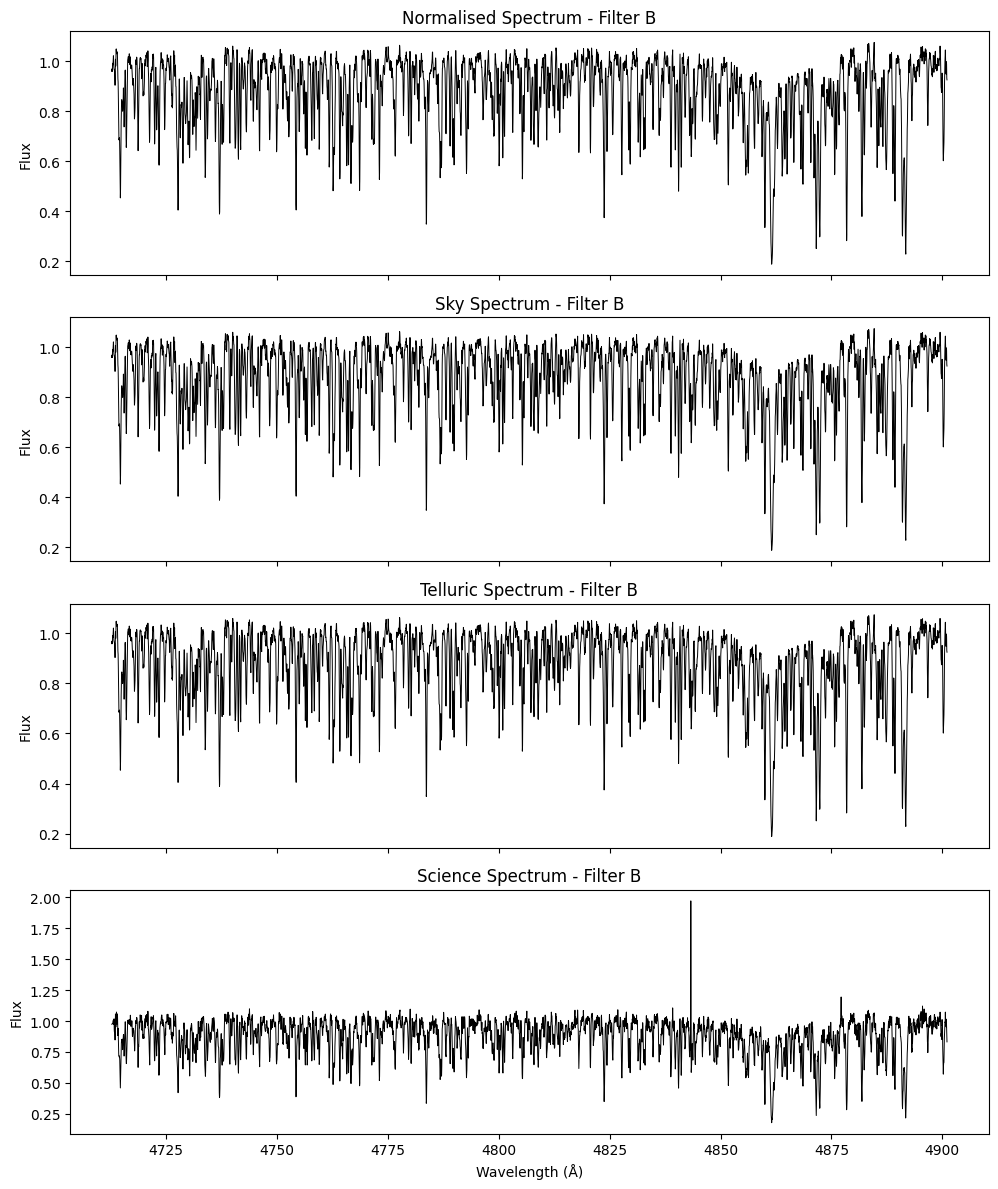

In [21]:
import matplotlib.pyplot as plt
from astropy.io import fits
from specutils import Spectrum1D
from astropy.visualization import quantity_support
from io import BytesIO
import requests

quantity_support()

# === SETTINGS ===
object_id = "161116001701343"
filt = "B"
subtypes = ["normalised", "sky", "telluric", "science"]
titles = ["Normalised", "Sky", "Telluric", "Science"]
base_url = "https://datacentral.org.au/vo/slink/links"

# === SETUP PLOTS ===
fig, axs = plt.subplots(len(subtypes), 1, figsize=(10, 12), sharex=True)
fig.subplots_adjust(hspace=0.4)

for i, subtype in enumerate(subtypes):
    ax = axs[i]
    url = (
        f"{base_url}?ID={object_id}&DR=galah_dr4&IDX=0"
        f"&FILT={filt}&DPSUBTYPE={subtype}&RESPONSEFORMAT=fits"
    )
    try:
        response = requests.get(url)
        response.raise_for_status()
        spec = Spectrum1D.read(BytesIO(response.content), format="wcs1d-fits")
        ax.plot(spec.wavelength, spec.flux, color='black', lw=0.7)
        ax.set_title(f"{titles[i]} Spectrum - Filter {filt}")
        ax.set_ylabel("Flux")
    except Exception as e:
        ax.set_title(f"{titles[i]} Spectrum - Filter {filt} (Unavailable)")
        ax.text(0.5, 0.5, "No data", transform=ax.transAxes,
                ha='center', va='center', fontsize=12, color='red')

axs[-1].set_xlabel("Wavelength (Å)")
plt.tight_layout()
plt.show()
